# Hypothesis testing in Python

A tutorial by Christoph Carl Kling, datascience ät c-kling.de

GESIS - Leibniz Institute for the Social Sciences

http://www.c-kling.de

This work is licensed under a Creative Commons Attribution 4.0 International License:
https://creativecommons.org/licenses/by/4.0/

## Preparation and Basics

Here we introduce concepts relevant for hypothesis testing, such as
* The normal distribution class in Python
* Maxmimum-Likelihood-Estimation
* Confidence intervals
* Sampling distributions

### Preparation

We start by telling Python to print plots in the notebook. 
Then we load the required libraries.

In [2]:
#Plot directly in the notebook
%matplotlib inline
#Statistics library
from scipy import stats as stats
#Library for plotting
import matplotlib.pyplot as plt
#Basic library for data manipulation
import numpy as np

### The normal distribution in Scipy

Now we create a class for a normal distribution with

$\mu = 20$

$\sigma = 2$

Scipy.stats has the normal distribution as class *norm*.

In [3]:
mu = 20;
sigma = 2;
normal_dist = stats.norm(mu,sigma);

#### Probability density function

We can plot the probability density function of this normal distribution:

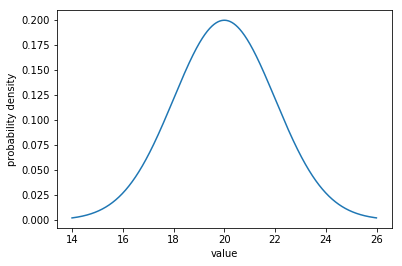

In [4]:
#plot the normal distribution
x = np.arange(mu - 3*sigma, mu + 3*sigma, 0.01);
y = normal_dist.pdf(x);

#plot values
plt.plot(x,y);
plt.xlabel("value");
plt.ylabel("probability density");
plt.show();

### Probability distributions in Scipy

In Scipy, continuous probability distributions share a common set of functions:
* rvs(loc=0, scale=1, size=1, random_state=None) 	Random variates.
* pdf(x, loc=0, scale=1) 	Probability density function.
* logpdf(x, loc=0, scale=1) 	Log of the probability density function.
* cdf(x, loc=0, scale=1) 	Cumulative density function.
* fit(data, loc=0, scale=1) 	Parameter estimates for generic data.
* median(loc=0, scale=1) 	Median of the distribution.
* mean(loc=0, scale=1) 	Mean of the distribution.
* var(loc=0, scale=1) 	Variance of the distribution.
* interval(alpha, loc=0, scale=1) 	Endpoints of the range that contains alpha percent of the distribution

We use rvs() to sample 100 **r**andom **v**alue**s**, print and plot them.

[ 16.57731794  18.84451617  19.43099148  20.33187495  20.55112356
  18.90675533  21.83224983  18.91059006  22.71383561  22.23918086
  23.46870926  20.13656014  22.09096277  20.87820079  20.32250464
  18.82058366  17.46792067  21.24155704  24.08253375  19.98775473
  20.56587003  20.94239193  19.34264992  22.28963886  18.40222709
  18.68898755  22.23857608  20.21064003  14.46331781  22.12742326
  21.56443814  20.64463194  21.68649634  17.99108578  20.45176252
  14.45338275  22.10990611  21.37744853  19.28268487  22.7228784
  24.21427532  19.60384944  18.16323844  21.13379755  21.29256139
  20.12158366  21.67488094  18.05102906  18.93344813  18.19359446
  20.46403913  19.98289526  23.29099796  20.12850647  21.15054592
  20.34183292  18.76554243  17.88474181  19.62839956  21.75781424
  20.64053491  25.38755201  19.63237134  19.65719506  23.27124169
  18.48192777  17.21492624  22.25865304  17.84680032  20.72346793
  21.24237559  21.76921179  19.50410603  19.53445142  20.97536655
  19.136458

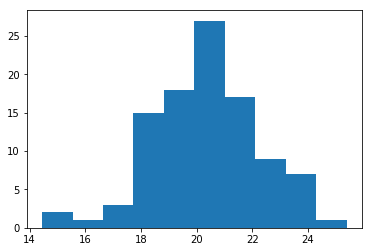

In [5]:
values = normal_dist.rvs(size=100);

print(values);
plt.hist(values);








## Likelihood:

We now want to calculate the likelihood (the probability density) of our observations using the function
* pdf(x, loc=0, scale=1) 	Probability density function.

In [6]:
print(normal_dist.pdf(values));

[ 0.04612363  0.16881049  0.19155945  0.19674371  0.19203976  0.17178979
  0.13110875  0.17196962  0.07944434  0.10658344  0.04433066  0.1990067
  0.11548653  0.18113905  0.19689457  0.16763545  0.08950024  0.1645125
  0.02483575  0.1994674   0.19164476  0.17851216  0.18898278  0.10358202
  0.14497478  0.16090681  0.10661953  0.19836791  0.00432241  0.11328744
  0.14689767  0.18937436  0.13978924  0.12044612  0.19444676  0.00426332
  0.11434344  0.15735415  0.18704551  0.07895762  0.02166407  0.19559626
  0.13083774  0.16986134  0.16187593  0.19910289  0.14047314  0.12407157
  0.17303224  0.132659    0.19417368  0.19946385  0.0515131   0.19905981
  0.16905094  0.1965788   0.16487438  0.11402069  0.19605764  0.13556222
  0.18949904  0.00529867  0.19612961  0.19656244  0.0523547   0.14954564
  0.07564793  0.10542295  0.11173567  0.18683836  0.1644707   0.13488273
  0.19343291  0.19413963  0.17710665  0.1817181   0.19242155  0.18611201
  0.12375422  0.15667079  0.12497054  0.05098728  0.1

### Log likelihood for a set of independent observations

Now we have the likelihood of each single observation. 

The likelihood of multiple independent variables is the product of their likelihoods.

This allows us to calculate the likelihood for multiple observations.

As this value quickly decreases, one typically calculates the **logarithm of the likelihood** for visalisations and calculations.

For calculating the product and taking the log, we write a simple function: 

In [7]:
def logLikelihood(distribution,x):
    likelihoods = distribution.logpdf(x);
    log_sum = np.sum(likelihoods);
    return log_sum;

print(logLikelihood(normal_dist,values));

-208.274976709


### Plotting the log likelihood
We now plot the likelihood for changing values of $\mu$, to find the optimal value:

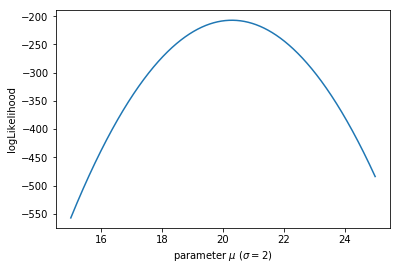

In [8]:
x=np.arange(mu - 5, mu + 5, 0.001);

y = [];
for i in range(0,len(x)):
    new_distribution=stats.norm(x[i],sigma);
    y.append(logLikelihood(new_distribution,values));        
plt.plot(x,y);
plt.ylabel("logLikelihood")
plt.xlabel("parameter $\mu$ ($\sigma =2$)");

### Maximum-Likelihood Estimate (MLE)

Using the average of the sampled values as an estimate for the mean, we maximise the likelihood:

$\hat{\mu}_{\text{MLE}} = \frac{1}{N} \sum_{i=1}^n x_i $

This can be graphically shown:

mean: 20.2927802881


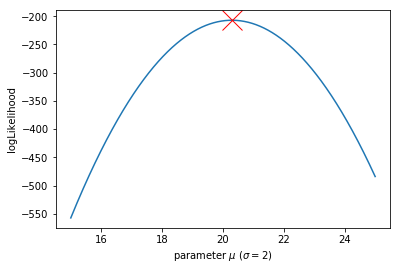

In [9]:
mean = np.average(values);

print("mean:",mean);

plt.ylabel("logLikelihood")
plt.xlabel("parameter $\mu$ ($\sigma =2$)");

meanNorm = new_distribution=stats.norm(mean,sigma);
logLikMean = logLikelihood(meanNorm, values);


plt.plot(
        x, y, 
        mean, logLikMean, "xr", markersize=20 #a big red cross at the maxial likelihood
        );


### Empirical sampling distribution for $\hat{\mu}_{\text{MLE}}$

We now sample 1,000 times 100 values from our normal distribution, and each time estimate the mean:

In [10]:
estimated_means = [];
n = 10;
samples = 1000;

for i in range(1,samples):
    new_values = normal_dist.rvs(size=n);
    estimated_mean = np.average(new_values);
    estimated_means.append(estimated_mean);

Then we plot the estimated means for the samples:

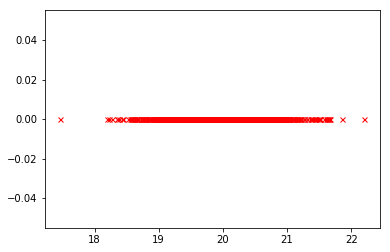

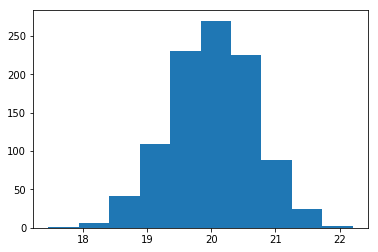

In [11]:
plt.plot(estimated_means,np.zeros(999), "xr", markersize=5);
plt.show();
plt.hist(estimated_means);

### Estimated confidence interval for the sampling distribution:

We can directly estimate the 95% interval of the sampling distribution from our samples (which is accurate, if we have many). It answers the question: Where will 95% of the estimated means be located?

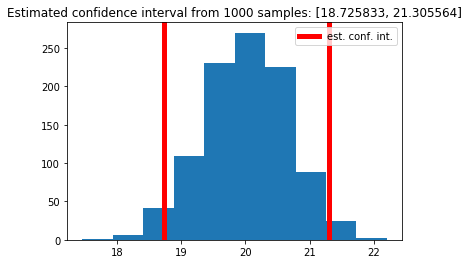

In [12]:
#We can estimate the confidence interval by sorting our samples
#and look at the first 2.5% and the last 2.5%
sorted_means = np.sort(estimated_means);

#first 2.5%:
first_index = int(np.round(samples * 0.025));
#last 2.5%
last_index = int(np.round(samples * 0.975));

#Estimate confidence interval from samples:
est_confidence_interval = [sorted_means[first_index],sorted_means[last_index]];

plt.hist(estimated_means);
plt.axvline(est_confidence_interval[0], color="red", linewidth=5);
plt.axvline(est_confidence_interval[1], color="red", linewidth=5);


plt.legend(["est. conf. int."])
plt.title("Estimated confidence interval from %i samples: [%f, %f]" 
          %(samples, est_confidence_interval[0],est_confidence_interval[1])
         );

plt.show();

## Sampling distribution for $\hat{\mu}_{\text{MLE}}$:

Theory tells us that the distribution is normal with

$\hat{\mu}_{\text{MLE}} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$.

### Visualisation sampling distribution

We can visually confirm this:

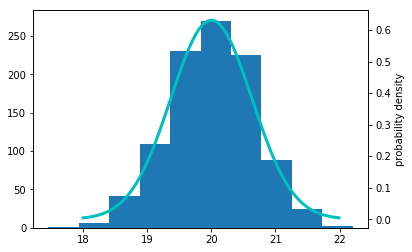

In [13]:
mu_sampling = mu;
sigma_sampling = sigma / np.sqrt(n);

sampling_dist = stats.norm(mu_sampling,sigma_sampling);

x = np.arange(mu - 2, mu + 2, 0.01);
y = sampling_dist.pdf(x);

ax = plt.gca()
ax2 = ax.twinx()
ax.hist(estimated_means);
ax2.plot(x, y, "c", linewidth=3);
plt.ylabel("probability density");

### Real confidence interval for the sampling distribution

Knowing the sampling distribution, we can plot the 95% confidence interval for our distribution.

We use the real sampling distribution and calculate the interval using the function

* *interval*(alpha, loc=0, scale=1): Endpoints of the range that contains alpha percent of the distribution

of the sampling distribution:

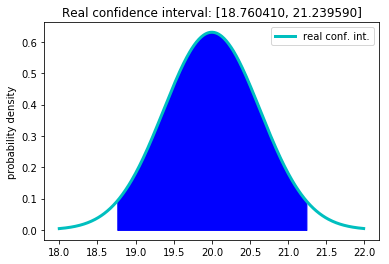

In [14]:
#We can directly read the confidence interval from the distribution
confidence_interval = sampling_dist.interval(0.95);

fillx0 = np.linspace(confidence_interval[0],confidence_interval[1],1000);
filly0 = sampling_dist.pdf(fillx0);

plt.fill_between(fillx0,filly0,0,color='blue');

plt.plot(x, y, "c", linewidth=3);
plt.ylabel("probability density");

plt.legend(["real conf. int."])
plt.title("Real confidence interval: [%f, %f]"
         %(confidence_interval[0],confidence_interval[1])
         );
plt.show();

### Z-score

If the estimated mean is normal with:

$\hat{\mu}_{\text{MLE}} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$

then we can standardise our estimate and calculate a z-score which is standard-normal:

$z = 
\frac{ \hat\mu - \mu } { \sigma / \sqrt n}
 \sim N(0,1)$
 
Let's show why we can turn every normal distribution into a standard-normal distribution with parameters 
$\mu=0, \sigma=1$:

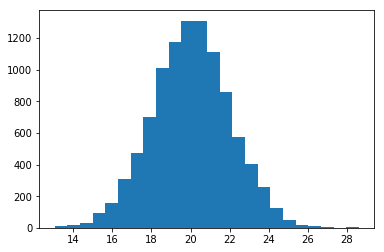

In [15]:
#We create an arbitrary normal distribution
mu = 20;
sigma = 2;
normal_dist = stats.norm(mu,sigma);

#We sample 10.000 values x from the normal distribution
values_x = normal_dist.rvs(size=10000);

#We create 100 bins for the histogram
bins = np.linspace(min(values_x), max(values_x), 25)

plt.hist(values_x, bins);

We move our sampled values and get new values which are distributed around $0$:

$x_{\text{new}} = x-\hat\mu$

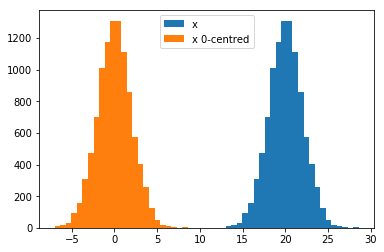

In [16]:
mu_hat = np.average(values_x);

values_x_new = np.subtract(values_x, mu_hat);

#Plot historgram of old values
plt.hist(values_x, bins);

#Plot histogram of new values
bins_new = np.linspace(min(values_x_new), max(values_x_new), 25)
plt.hist(values_x_new, bins_new);

plt.legend(["x", "x 0-centred"]);

We divide our new x by the estimated standard deviation and yield the standardised values:

$x_{\text{standardised}} = x_{\text{new}} / \hat\sigma$

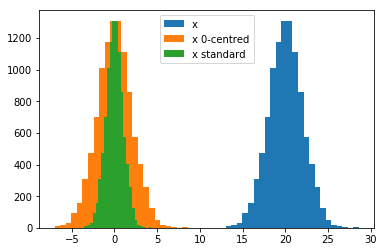

In [17]:
sigma_hat = np.std(values_x);

values_x_standard = np.divide(values_x_new, sigma_hat);

#Plot historgram of old values
plt.hist(values_x, bins);

#Plot histogram of new values
bins_new = np.linspace(min(values_x_new), max(values_x_new), 25)
plt.hist(values_x_new, bins_new);

#Plot histogram of standardised values
bins_new = np.linspace(min(values_x_standard), max(values_x_standard), 25)
plt.hist(values_x_standard, bins_new);

plt.legend(["x", "x 0-centred", "x standard"]);

$x_{\text{standardised}} = z \sim N(0,1)$

#### Z-Score for $\hat\mu$

So we can calculate the z-score for our mean estimate $\hat\mu$:

$z = 
\frac{ \hat\mu - \mu } { \sigma / \sqrt n}
 \sim N(0,1)$
 
 which we can plot:

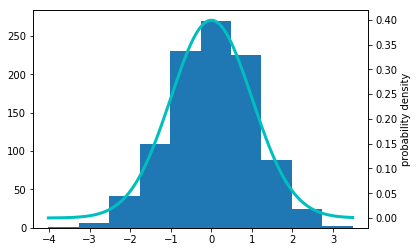

In [18]:
#We standardise our estimated means
est_means_centered = np.subtract(estimated_means,mu);
est_means_standard = np.divide(est_means_centered,sigma/np.sqrt(n));

#We also plot the standard normal distribution
standard_normal = stats.norm(0,1);
x = np.arange(min(est_means_standard), max(est_means_standard), 0.01);
y = standard_normal.pdf(x);

ax = plt.gca()
ax2 = ax.twinx()
ax.hist(est_means_standard);
ax2.plot(x, y, "c", linewidth=3);

plt.ylabel("probability density");

## Hypothesis testing, finally:

Given theat we have a sample of $n=10$ observations $\{x_1, x_2, \dots, x_n\}$ with an estimated mean of

$\hat\mu = 20.5$

### Our Hypothesis

We hypothesise that the $n$ observations were generated from **another** distribution than the normal distribution we defined earlier: $N(20,2)$.

Our null-hypothesis is the opposite: That the observations indeed are the distribution $N(20,2)$:

$H_0 : \quad \{x_1, x_2, \dots, x_n\} \sim N(20,2)$

and we try to reject this hypothesis to support our hypothesis! Our significance level is $\alpha=0.05$. 

**Null hypothesis: The sample was generated from a normal distribution with known mean $\boldsymbol\mu$ and known variance $\boldsymbol\sigma$.**

**What we need is the *p-value* - the probability, that our null hypothesis is true.**

### Empirical testing (always works!)

We use our estimate of $\mu$ as test statistic.

We sample 1,000 mean estimates from our null-hypothesis model and calculate how likely $\hat\mu$ is to occur:

Mu hat =  20.5


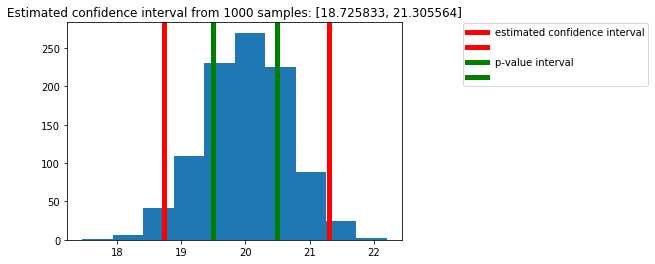

We can not reject H0 at alpha = 0.05. The estimated p-value is: 0.46


In [19]:
mu_hat = 20.5;
print("Mu hat = ",mu_hat);

x = np.arange(mu - 2, mu + 2, 0.01);
y = sampling_dist.pdf(x);

#We can estimate the confidence interval by sorting our samples
#and look at the first 2.5% and the last 2.5%
sorted_means = np.sort(estimated_means);

#Get empirical means which are more extreme than mu_hat:
#get absolute difference of mu_hat and mu
mu_hat_diff = abs(mu-mu_hat);

#get the indices of the empirical means which are more extreme than this difference:
start_p_value = mu-mu_hat_diff;
end_p_value = mu+mu_hat_diff;

#first 2.5%:
first_index = int(np.round(samples * 0.025));
#last 2.5%
last_index = int(np.round(samples * 0.975));

#Estimate confidence interval from samples:
est_confidence_interval = [sorted_means[first_index],sorted_means[last_index]];

plt.hist(estimated_means);
plt.axvline(est_confidence_interval[0], color="red", linewidth=5);
plt.axvline(est_confidence_interval[1], color="red", linewidth=5);

plt.axvline(start_p_value, color="green", linewidth=5);
plt.axvline(end_p_value, color="green", linewidth=5);

plt.legend(["estimated confidence interval","","p-value interval",""],bbox_to_anchor=(+1.75, +1.02), loc='upper right', ncol=1)
plt.title("Estimated confidence interval from %i samples: [%f, %f]" 
          %(samples, est_confidence_interval[0],est_confidence_interval[1])
         );

plt.show();

if ((mu_hat<est_confidence_interval[0]) | (mu_hat>est_confidence_interval[1])):
    p=1
    if (mu_hat<mu):
        #Find number of empirical means smaller than the given mu_hat:
        number_smaller_mu = len([i for i in estimated_means if i < mu_hat]);
        p_est = 2*(number_smaller_mu/samples);
    if (mu_hat>mu):
        #Find number of empirical means larger than the given mu_hat:
        number_greater_mu = len([i for i in estimated_means if i > mu_hat]);
        p_est = 2*(number_greater_mu/samples);
    print("We can reject H0 at alpha = 0.05. The estimated p-value is:",p_est);
else:
    p=1
    if (mu_hat<mu):
        #Find number of empirical means smaller than the given mu_hat:
        number_smaller_mu = len([i for i in estimated_means if i < mu_hat]);
        p_est = 2*(number_smaller_mu/samples);
    if (mu_hat>mu):
        #Find number of empirical means larger than the given mu_hat:
        number_greater_mu = len([i for i in estimated_means if i > mu_hat]);
        p_est = 2*(number_greater_mu/samples);
    print("We can not reject H0 at alpha = 0.05. The estimated p-value is:",p_est);

### Parametric test

Theory tells us that

$z = 
\frac{ \hat\mu - \mu } { \sigma / \sqrt n}
 \sim N(0,1)$
 
so we can calculate z for $\hat\mu = \bar{x}$, $n=100$, $\mu = 20$, $\sigma = 2$ and look up the score (e.g. in a table or here in Python):

Mu hat =  20.5


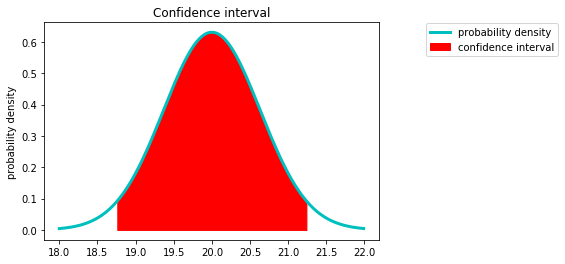

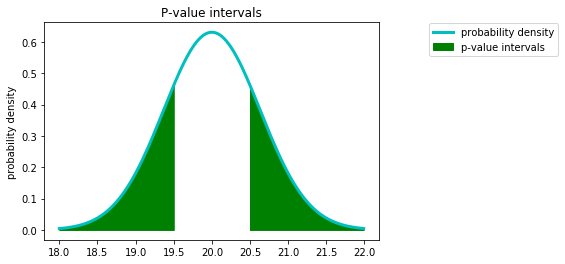

We can not reject H0 at alpha = 0.05. The p-value is: 0.42919530044 (z= 0.790569415042 )


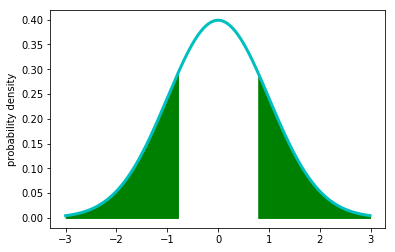

In [20]:
mu_hat = 20.5;
print("Mu hat = ",mu_hat);

z = (mu_hat - mu)/(sigma/np.sqrt(n));

#We can directly read the confidence interval from the distribution
confidence_interval = sampling_dist.interval(0.95);

fillx1 = np.linspace(confidence_interval[0],confidence_interval[1],1000);
filly1 = sampling_dist.pdf(fillx1);

plt.fill_between(fillx1,filly1,0,color='red');

plt.plot(x, y, "c", linewidth=3);
plt.ylabel("probability density");
plt.legend(["probability density","confidence interval"],bbox_to_anchor=(+1.55, +1.02), loc='upper right', ncol=1)

plt.title("Confidence interval");
plt.show();


fillx2 = np.linspace(x[0],start_p_value,1000);
fillx3 = np.linspace(end_p_value,x[-1],1000);
filly2 = sampling_dist.pdf(fillx2);
filly3 = sampling_dist.pdf(fillx3);

plt.fill_between(fillx2,filly2,0,color='green');
plt.fill_between(fillx3,filly3,0,color='green');


plt.plot(x, y, "c", linewidth=3);
plt.ylabel("probability density");
plt.legend(["probability density","p-value intervals"],bbox_to_anchor=(+1.55, +1.02), loc='upper right', ncol=1)

plt.title("P-value intervals");
plt.show();


interval_95 = standard_normal.interval(0.95);
if ((z<interval_95[0]) | (z>interval_95[1])):
    if (z<interval_95[0]):
        p = 2*standard_normal.cdf(z);
    if (z>interval_95[1]):
        p = 2*(1.0-standard_normal.cdf(z));
    print("We can reject H0 at alpha = 0.05. The p-value is:",p, "(z=",z,")");
else:
    p=1
    if (z<0):
        p = 2*standard_normal.cdf(z);
    if (z>0):
        p = 2*(1.0-standard_normal.cdf(z));
    print("We can not reject H0 at alpha = 0.05. The p-value is:",p, "(z=",z,")");
    
#We also plot the standard normal distribution for z
standard_normal = stats.norm(0,1);
x4 = np.arange(-3, +3, 0.01);
y4 = standard_normal.pdf(x4);

fillx4 = np.linspace(x4[0],-abs(z),1000);
fillx5 = np.linspace(abs(z),x4[-1],1000);
filly4 = standard_normal.pdf(fillx4);
filly5 = standard_normal.pdf(fillx5);

plt.plot(x4, y4, "c", linewidth=3);
plt.fill_between(fillx4,filly4,0,color='green');
plt.fill_between(fillx5,filly5,0,color='green');
plt.ylabel("probability density");

## Student t-test:

If we do not know the variance of our distribution in the null-hypothesis, i.e. we want to test if the samples are from a distribution with known mean but unknown variance, then things are changing.

**Null hypothesis: The sample was generated from a normal distribution with known mean $\boldsymbol\mu$ and unknown variance.**

### Test statistic t-test

For calculating the z-score, we calculated:

$z = 
\frac{ \hat\mu - \mu } { \sigma / \sqrt n}
 \sim N(0,1)$.
 
Since we do not know $\sigma$, we have to estimate it with an unbiased estimator:

$\hat{\sigma}^2 = \frac {1}{n-1} \sum_{i=1}^n  \left(x_i - \overline{x} \right)^ 2 $

If we re-calculate our test statistic with the estimated variance, we get:

$t = \frac{ \hat{\mu} - \mu} {\hat{\sigma} / \sqrt{n}} $

which is not normally, but Student-t distributed with parameter $n-1$, where $n$ is the sample size.

Showing the empirical distributions of sampled t-statistics and z-scores, we see that the new distribution is a tiny bit broader.

-3.47957325936


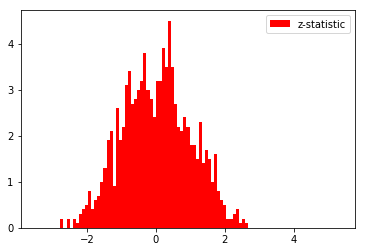

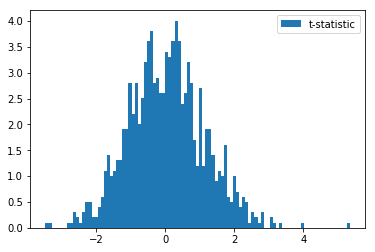

In [21]:
estimated_means = [];
estimated_sigmas = [];
n = 10;
samples = 1000;

for i in range(1,samples):
    new_values = normal_dist.rvs(size=n);
    estimated_mean = np.mean(new_values);
    estimated_means.append(estimated_mean);
    estimated_sigma = np.sqrt(np.divide(np.sum(np.power(np.subtract(new_values,estimated_mean),2)), (n-1)))
    estimated_sigmas.append(estimated_sigma);
 
        
#The test statistic z if we know sgima
z = np.divide(np.subtract(estimated_means,mu),sigma/np.sqrt(n));
#The new test statistic t, sigma is estimated
t = np.divide(np.subtract(estimated_means,mu),estimated_sigmas/np.sqrt(n));
print(min(t))

#We need weights for normalising the histogram
z_weights = 100 * np.ones_like(z) / z.size
t_weights = 100 * np.ones_like(t) / t.size

bins = np.linspace(min(t), max(t), 100)
plt.hist(z,bins,color='red',label='z-statistic',alpha=1,weights=z_weights);
plt.legend(loc='upper right')
plt.show();
plt.hist(t,bins,label='t-statistic',alpha=1,weights=t_weights);
plt.legend(loc='upper right')
plt.show();

#### The t-distribution

The t-distribution is similar to the standard normal distribution, but a bit broader. It has only one parameter, the degree of freedom (df). For $\text{df} \geq 30$, the standard normal distribution is a reasonable approximation for the t-distribution.

Scipy.stats has the t-distribution as class *t*.

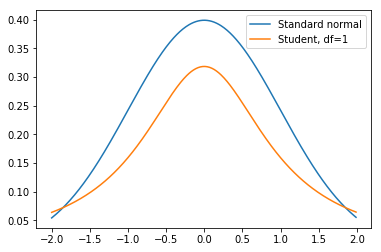

In [24]:
x = np.arange(-10, 10, 0.01);
y1 = standard_normal.pdf(x);
#We create a Student t-distribution with df = 1
student_t_1 = stats.t(1)
y2 = student_t_1.pdf(x);

plt.plot(x,y1);
plt.plot(x,y2);
plt.legend(["Standard normal","Student, df=1"]);
plt.show();

#### t-test in Scipy

Now we can test if our sampled values are from a normal distribution with mean mu.

For this, we can use the function
* Scipy.stats.ttest_1samp (parameters: samples, mu of the normal distribution from the null hypothesis)

it returns the test statistic t and the p-value.

In [39]:
print("We test if the mean of our sampled values,", np.average(values));
print("is likely to be observed if the values were sampled from a normal distribution with mean", mu, "\n\n");

t, p_value = stats.ttest_1samp(values, mu);

print("The test statistics t is",t,"and the p-value is",p_value)

We test if the mean of our sampled values, 19.9222121106
is likely to be observed if the values were sampled from a normal distribution with mean 20 


The test statistics t is -0.389265211454 and the p-value is 0.697916021674


In [41]:
#We sample 10 values from a standard normal distribution:
standard_normal_values = standard_normal.rvs(size=10);

print("We test if the mean of our sampled values,", np.average(standard_normal_values));
print("is likely to be observed if the values were sampled from a normal distribution with mean", mu, "\n\n");

t, p_value = stats.ttest_1samp(standard_normal_values, mu);

print("The test statistics t is ",t,"and the p-value is",p_value)

We test if the mean of our sampled values, -0.391640187659
is likely to be observed if the values were sampled from a normal distribution with mean 20 


The test statistics t is  -72.3585265594 and the p-value is 9.29848075977e-14


## Two-sample t-test:

Given two samples of same size and same variance, we can do a test if the two samples stem from the same normal distribution. Both samples have the same size n.

**Null hypothesis: Both samples were generated from the same normal distribution (unknown mean and variance).**

The test statistic is:

$t = \frac{\hat\mu_1 - \hat\mu_2}{\hat\sigma_p \sqrt{2/n}} $

where $\hat\sigma_p^2$ is the so-called pooled variance, the average estimated variance of both samples:

$\ \hat\sigma_p^2 = \frac{\hat\sigma_{1}^2+\hat\sigma_{2}^2}{2}$

The test statistic follows a t-distribution with $\text{df} = 2n - 2$.


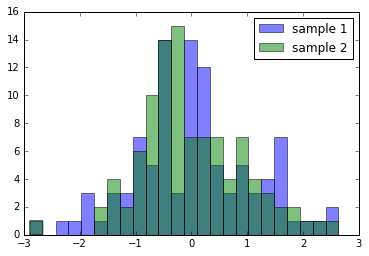

In [20]:
#We sample 100 values from a standard normal distribution:
standard_normal_values = standard_normal.rvs(size=100);

#We sample another 100 values from a standard normal distribution:
standard_normal_values_2 = standard_normal.rvs(size=100);

#Plot transparent histogram
bins = np.linspace(min(standard_normal_values), max(standard_normal_values), 25)
plt.hist(standard_normal_values,bins,label='sample 1',alpha=0.5);
plt.hist(standard_normal_values_2,bins,label='sample 2',alpha=0.5);
plt.legend(loc='upper right')
plt.show();

#### Calculating the two-sample t-statistics and p-value with scipy

Now we can calculate 

$t = \frac{\hat\mu_1 - \hat\mu_2}{\hat\sigma_p \sqrt{2/n}} $

and calculate the p-value, which tells us how how probable it is to see such an extreme $t$.

The Scipy function for a two-sample t-test is
* Scipy.stats.ttest_ind (parameters: sample 1, sample 2)

it returns the test statistic t and the p-value.

In [21]:
t, p_value = stats.ttest_ind(standard_normal_values, standard_normal_values_2);
print("The test statistics t is",t,"and the p-value is",p_value)

The test statistics t is  0.214101805848 and the p-value is 0.830687991247


So we would likely observe the calculated $t$ under the null-hypothesis that both distributions are the same.

Now let's create an example where the distributions are different:

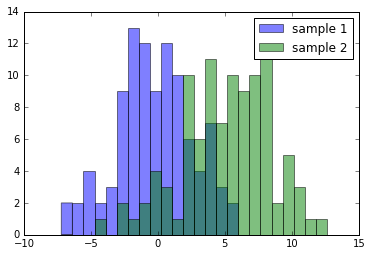

The test statistics t is -12.1418303638 and the p-value is 1.01866548e-25


In [43]:
#We sample 100 values from two different normal distributions:

mu_1 = 0;
mu_2 = 5;
sigma_ttest = 3;

normal_dist_1 = stats.norm(mu_1,sigma_ttest);
normal_dist_2 = stats.norm(mu_2,sigma_ttest);

normal_values = normal_dist_1.rvs(size=100);
normal_values_2 = normal_dist_2.rvs(size=100);

#plot transparent histograms
bins = np.linspace(min(normal_values), max(normal_values_2), 25)
plt.hist(normal_values,bins,label='sample 1',alpha=0.5);
plt.hist(normal_values_2,bins,label='sample 2',alpha=0.5);
plt.legend(loc='upper right')
plt.show();

#calculate p-value
t, p_value = stats.ttest_ind(normal_values, normal_values_2);
print("The test statistics t is",t,"and the p-value is",p_value)

Now the observed $t$ is unlikely under the null-hypothesis.

This is expected, as the null-hypothesis indeed is wrong (we sampled from two different normal distributions).

## ANOVA – Generalisation for more than 2 samples

If we have more than two samples and we want to find out if they all were sampled from the same distribution, we can use ANOVA: ANalysis Of VAriance.

**Null hypothesis: All samples were generated from the same normal distribution (unknown mean and variance).**

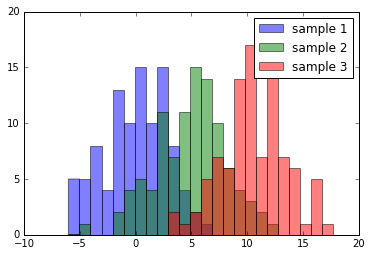

In [52]:
#We sample 100 values from different normal distributions:

mu_1 = 0;
mu_2 = 5;
mu_3 = 10;

sigma_anova = 3;

normal_dist_1 = stats.norm(mu_1,sigma_anova);
normal_dist_2 = stats.norm(mu_2,sigma_anova);
normal_dist_3 = stats.norm(mu_3,sigma_anova);

normal_values = normal_dist_1.rvs(size=100);
normal_values_2 = normal_dist_2.rvs(size=100);
normal_values_3 = normal_dist_3.rvs(size=100);

#plot transparent histograms
bins = np.linspace(min(normal_values), max(normal_values_3), 25)
plt.hist(normal_values,bins,label='sample 1',alpha=0.5);
plt.hist(normal_values_2,bins,label='sample 2',alpha=0.5);
plt.hist(normal_values_3,bins,label='sample 3',alpha=0.5);
plt.legend(loc='upper right')
plt.show();

#### F-distribution
In contrast to the t-test, the ANOVA is based on sample variances and not on sample means. It calculates the test statistics F, which follows an F-distribution.

The F-distribution has two parameters as input. We plot the distribution for parameters (1,1), (10,10) and (100,100).

Scipy.stats has the F-distribution as class *f*.

The F statistics is computed as:

$F = \frac{\text{between-group variability}}{\text{within-group variability}}$

$= \frac{\sum_{i=1}^{K} n_i \cdot (\bar{Y}_{i\cdot} - \bar{Y})^2/(K-1)}
{\sum_{i=1}^{K}\sum_{j=1}^{n_{i}} (Y_{ij}-\bar{Y}_{i\cdot})^2/(N-K)}$

where $Y_{ij}$ is the $j$th observation in sample $i$ and $\bar Y_{i}$ is the sample mean of sample $i$.

The statistics follows an F-distribution with parameters $K-1$ and $N-K$, where K is the number of groups and N is the total number of observations.

Scipy has a class
* *stats.f()*
for the f-distribution.

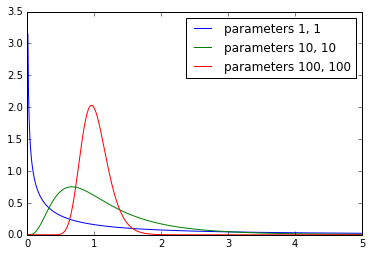

In [48]:
#instantiate classes for f-distributions
fdistribution_1 = stats.f(1,1);
fdistribution_2 = stats.f(10,10);
fdistribution_3 = stats.f(100,100);


#we plot the F-distribution between 0.01 and 5
x_fdist = np.arange(0.01, 5, 0.01);

#get probability density function values
y_fdist_1 = fdistribution_1.pdf(x_fdist);
y_fdist_2 = fdistribution_2.pdf(x_fdist);
y_fdist_3 = fdistribution_3.pdf(x_fdist);

#plot
plt.plot(x_fdist,y_fdist_1);
plt.plot(x_fdist,y_fdist_2);
plt.plot(x_fdist,y_fdist_3);

plt.legend(["parameters 1, 1", "parameters 10, 10", "parameters 100, 100"]);

#### ANOVA in Scipy

In scipy, the function 
* f_oneway (parameters: sample1, sample2, ... : array_like)

returns the test-statistics F and the p-value.

First, we calculate the F-score and p-value for the two samples from our t-test example.

The Scipy function for ANOVA is
* Scipy.stats.ttest_ind (parameters: sample 1, sample 2)

it returns the test statistic F and the p-value.

In [24]:
#Same t-test as before
t, p_value = stats.ttest_ind(normal_values, normal_values_2);
print("The test statistics t is",t,"and the p-value is",p_value)

#ANOVA
F, p_value = stats.f_oneway(normal_values, normal_values_2);
print("The test statistics F is",F,"and the p-value is",p_value);

The test statistics t is  -13.1259907207 and the p-value is 1.00171890638e-28
The test statistics F is  172.2916324 and the p-value is 1.00171890638e-28


Both tests have the same null-hypothesis that the samples were drawn from a single normal distribution.

We can see that the p-value, the probability that the null-hypothesis is true, is identical for both tests. This is expected, as we test the same null-hypothesis.

For the t-test we used the sample means, for ANOVA we used the variances of the samples.

#### Example ANOVA with three samples

Now we calculate ANOVA for an example with three samples. The t-test can not be calculated in this case.

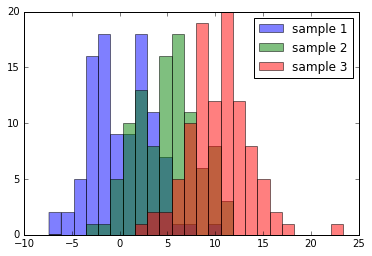

The test statistics F is 256.488131422 and the p-value is 1.97786850871e-65


In [50]:
#plot transparent histograms
bins = np.linspace(min(normal_values), max(normal_values_3), 25)
plt.hist(normal_values,bins,label='sample 1',alpha=0.5);
plt.hist(normal_values_2,bins,label='sample 2',alpha=0.5);
plt.hist(normal_values_3,bins,label='sample 3',alpha=0.5);
plt.legend(loc='upper right')
plt.show();

#calculate F and p-value
F, p_value = stats.f_oneway(normal_values, normal_values_2, normal_values_3);
print("The test statistics F is",F,"and the p-value is",p_value)

#### ANOVA for three samples from the same normal distribution
Now we change our three samples in a way that they are all drawn from the same normal distributions.

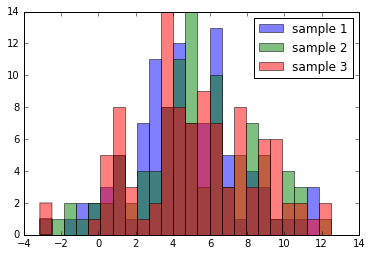

The test statistics F is 0.97152586631 and the p-value is 0.379704609782


In [51]:
#We sample 100 values from different normal distributions:

mu_1 = 5;
mu_2 = 5;
mu_3 = 5;

sigma_anova = 3;

normal_dist_1 = stats.norm(mu_1,sigma_anova);
normal_dist_2 = stats.norm(mu_2,sigma_anova);
normal_dist_3 = stats.norm(mu_3,sigma_anova);

normal_values = normal_dist_1.rvs(size=100);
normal_values_2 = normal_dist_2.rvs(size=100);
normal_values_3 = normal_dist_3.rvs(size=100);

#plot histograms
bins = np.linspace(min(normal_values), max(normal_values_3), 25)
plt.hist(normal_values,bins,label='sample 1',alpha=0.5);
plt.hist(normal_values_2,bins,label='sample 2',alpha=0.5);
plt.hist(normal_values_3,bins,label='sample 3',alpha=0.5);
plt.legend(loc='upper right')
plt.show();

#get F statistic
F, p_value = stats.f_oneway(normal_values, normal_values_2, normal_values_3);
print("The test statistics F is",F,"and the p-value is",p_value)

The p-value is high - we can not reject the null-hypothesis at significance level $\alpha = 0.05$.

As the null-hypothesis is true, we expected this result!

# Bonus

Here I collect some code I wrote which did not make it to the workshop.

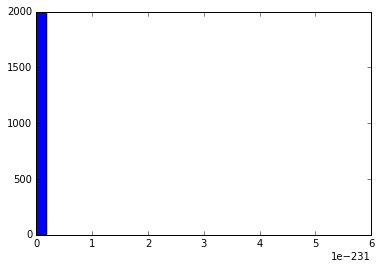

In [27]:
#We sample 100 values from two different normal distributions:
p_values = [];
for i in range(0,len(x)):
    
    mu_1 = -100;
    mu_2 = 2;
    sigma_ttest = 3;
    
    standard_normal_values = stats.norm(mu_1,sigma_ttest).rvs(size=100);
    standard_normal_values2 = stats.norm(mu_2,sigma_ttest).rvs(size=100);
    
    t, p_value = stats.ttest_ind(standard_normal_values, standard_normal_values2);   
    p_values.append(p_value);
    
plt.hist(p_values, bins=30);

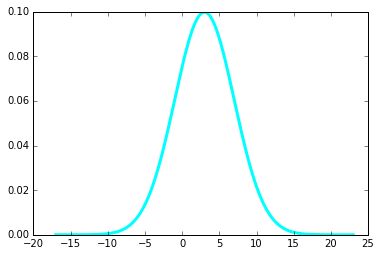

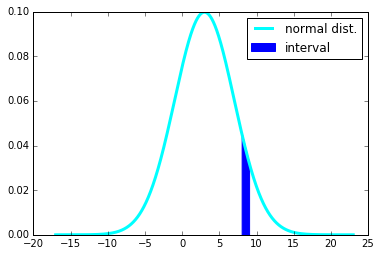

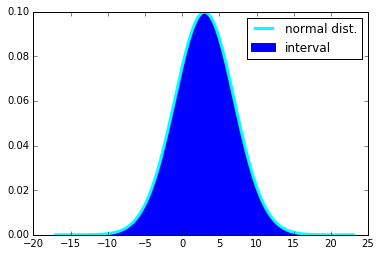

In [11]:
example_mu = 3;
example_sigma = 4;
normal_example = stats.norm(example_mu,example_sigma);

example_x = np.arange(example_mu-5*example_sigma,example_mu+5*example_sigma,0.001);
example_y = normal_example.pdf(example_x);

fillx0 = np.linspace(8,9,1000);
filly0 = normal_example.pdf(fillx0);

fillx1 = np.linspace(example_mu-5*example_sigma,example_mu+5*example_sigma,1000);
filly1 = normal_example.pdf(fillx1);

plt.plot(example_x, example_y, color='cyan', linewidth=3);
plt.show();

plt.plot(example_x, example_y, color='cyan', linewidth=3);
plt.fill_between(fillx0,filly0,0,color='blue');

#plt.ylabel("probability density");

plt.legend(["normal dist.","interval"])
plt.show();


plt.plot(example_x, example_y, color='cyan', linewidth=3);
plt.fill_between(fillx1,filly1,0,color='blue');

#plt.ylabel("probability density");

plt.legend(["normal dist.","interval"])
plt.show();

In [25]:
print(normal_example.pdf(3))
print(normal_example.pdf(8))
print(normal_example.pdf(3)/normal_example.pdf(8))

0.0997355701004
0.0456622713473
2.18420081082
